In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [3]:
data = pd.read_csv("Salary Data.csv")
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# Data Exploration

In [11]:
data.shape

(375, 6)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [16]:
data.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [18]:
data.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [20]:
data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [19]:
data.columns = ['Age','Gender','Degree', 'Job_Title', 'Experience_years', 'Salary']

In [21]:
data.columns

Index(['Age', 'Gender', 'Degree', 'Job_Title', 'Experience_years', 'Salary'], dtype='object')

In [36]:
data1.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [23]:
data.dtypes

Age                 float64
Gender               object
Degree               object
Job_Title            object
Experience_years    float64
Salary              float64
dtype: object

In [38]:
data[data.duplicated()].shape

(50, 6)

In [6]:
data1 = data.drop_duplicates(keep='first')
data1.shape

(325, 6)

In [8]:
data1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [25]:
# co-relation
corr = data[['Age','Experience_years','Salary']].corr()
corr

,Age,Experience_years,Salary
Age,1.000000,0.979128,0.922335
Experience_years,0.979128,1.000000,0.930338
Salary,0.922335,0.930338,1.000000


# Data Visualisation

In [42]:
data1['Education Level'].value_counts()

Education Level
Bachelor's    191
Master's       91
PhD            42
Name: count, dtype: int64

<Axes: xlabel='Education Level'>

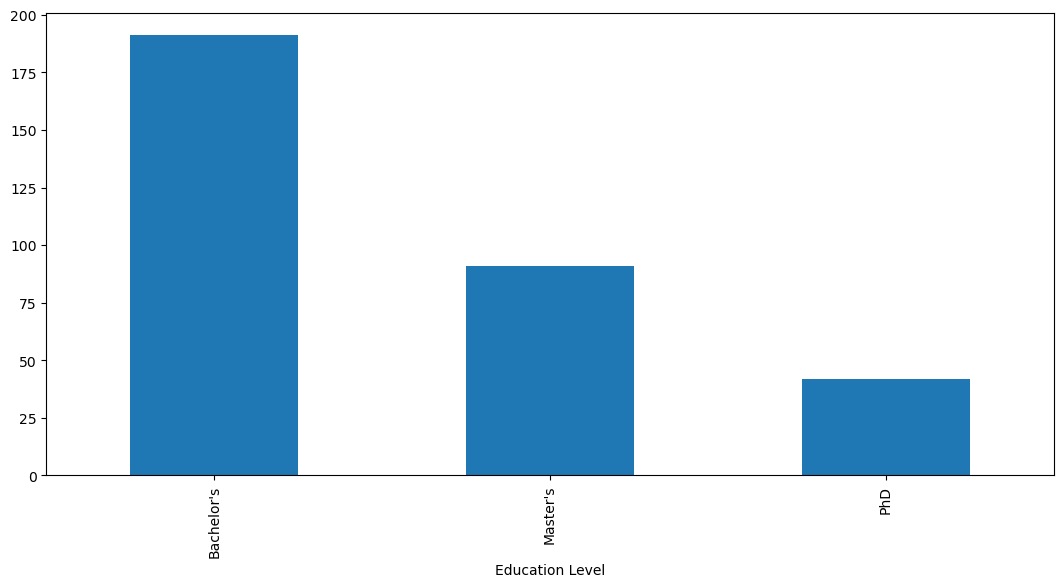

In [48]:
data1['Education Level'].value_counts().plot(kind='bar', figsize=(13,6))

In [50]:
data1['Job Title'].value_counts()

Job Title
Director of Operations             9
Director of Marketing              8
Senior Marketing Manager           8
Senior Project Manager             7
Senior Business Analyst            6
                                  ..
Business Development Manager       1
Customer Service Representative    1
IT Manager                         1
Digital Marketing Manager          1
Junior Web Developer               1
Name: count, Length: 174, dtype: int64

<Axes: ylabel='Gender'>

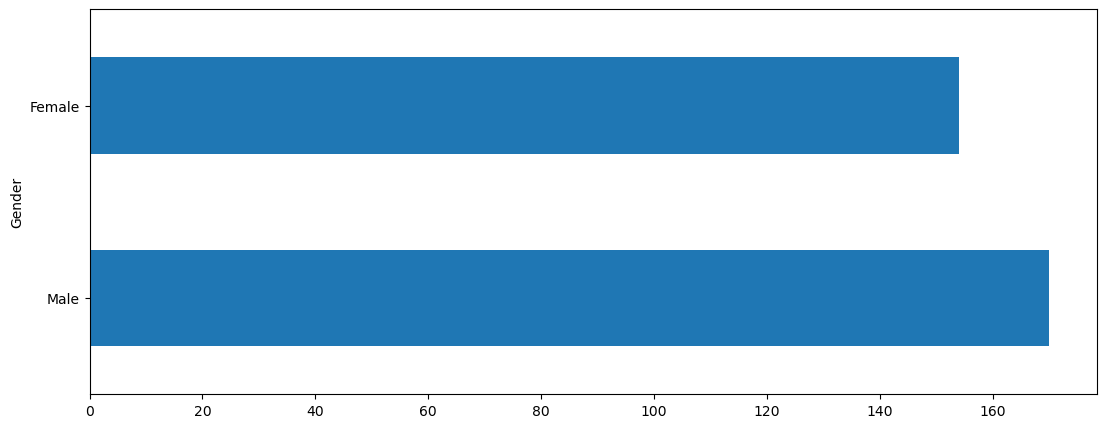

In [52]:
data1['Gender'].value_counts().plot(kind='barh', figsize=(13,5))

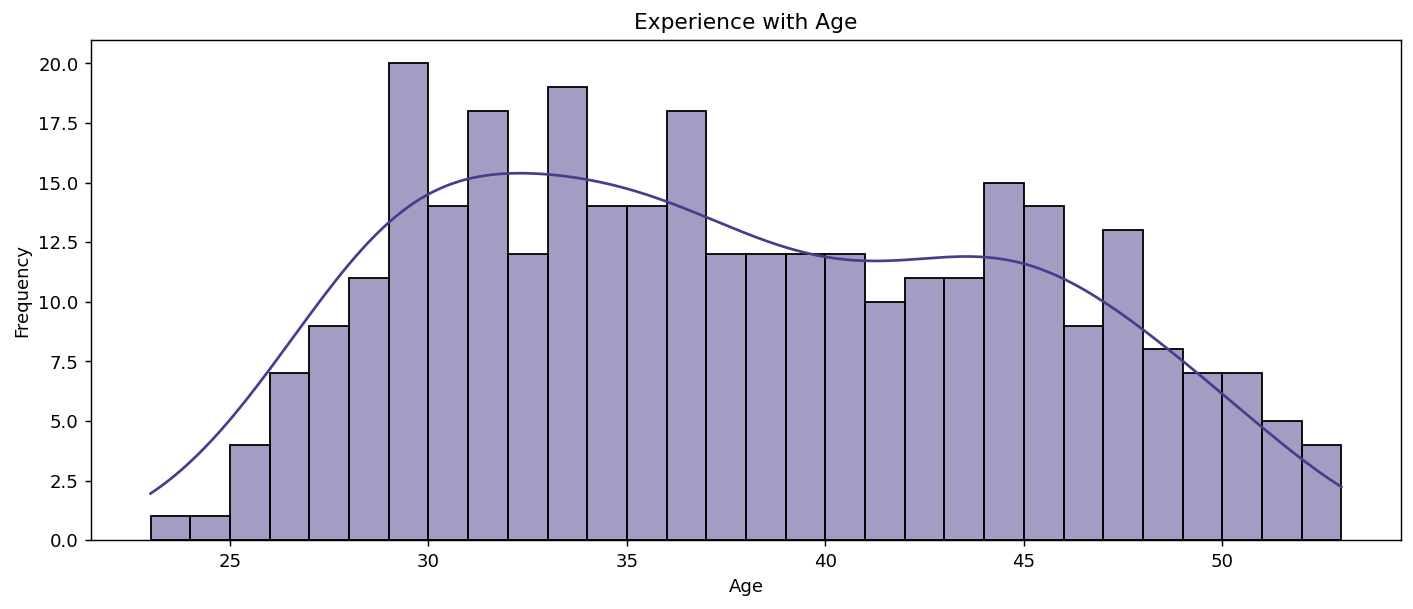

In [54]:
plt.figure(figsize=(13,5), dpi=130)
sns.histplot(data1['Age'], bins=30, kde=True, color="darkslateblue")
plt.title("Experience with Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

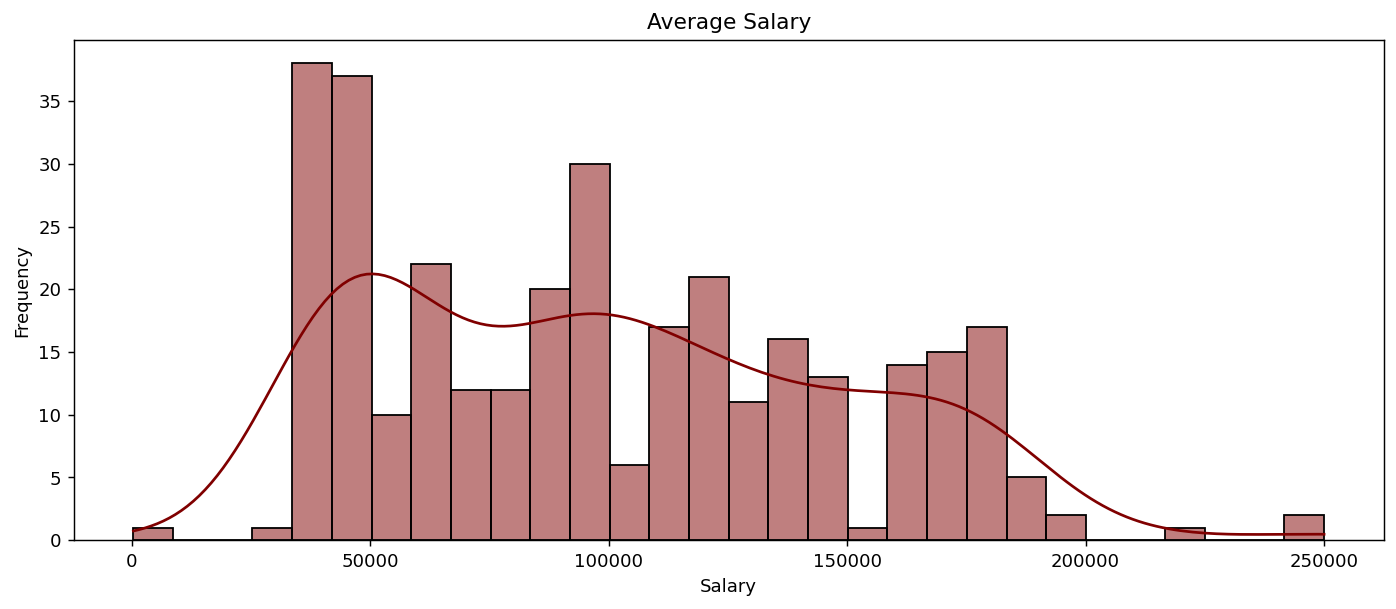

In [56]:
plt.figure(figsize=(13,5), dpi=130)
sns.histplot(data1['Salary'], bins=30, kde=True, color="maroon")
plt.title("Average Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

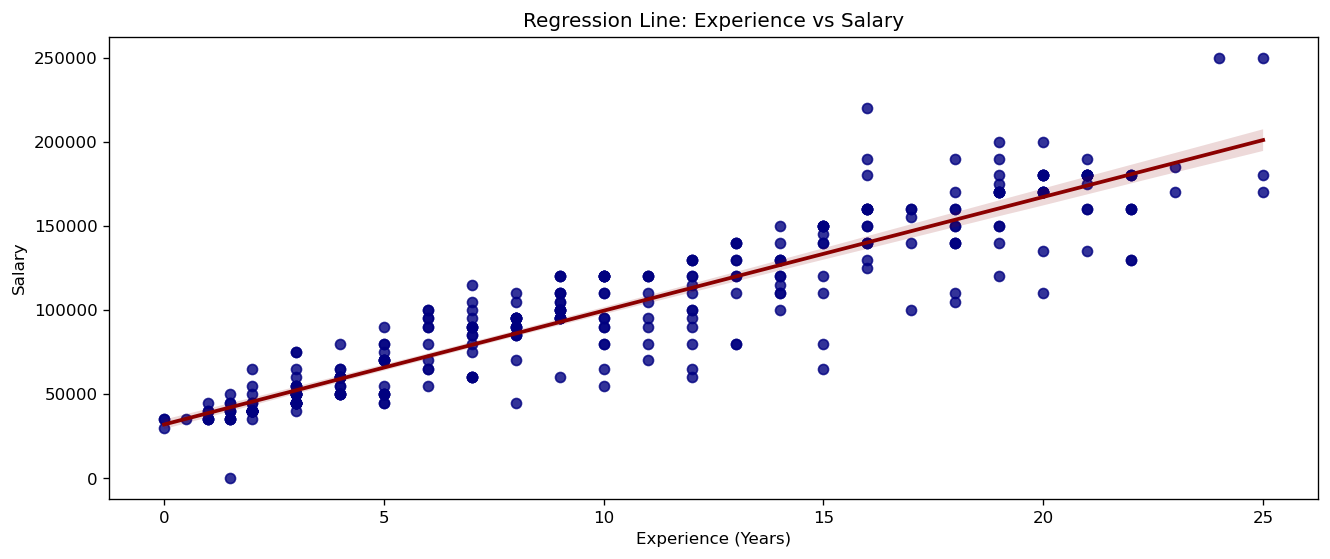

In [60]:
plt.figure(figsize=(13, 5), dpi=120)
sns.regplot(x="Years of Experience", y="Salary", data=data1, scatter_kws={"color": "navy"}, line_kws={"color": "darkred"})
plt.title("Regression Line: Experience vs Salary")
plt.xlabel("Experience (Years)")
plt.ylabel("Salary")
plt.show()

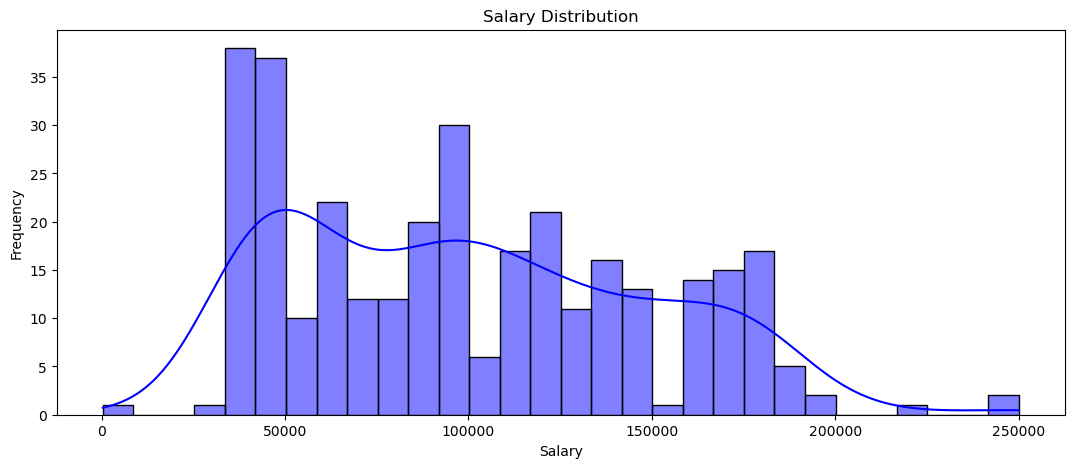

In [62]:
plt.figure(figsize=(13, 5))
sns.histplot(data1['Salary'], bins=30, kde=True, color="blue")
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

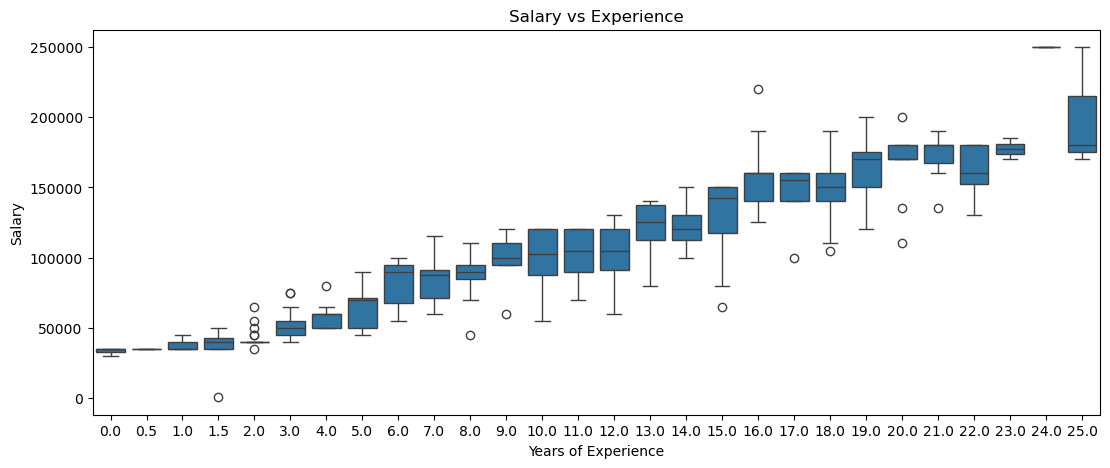

In [66]:
plt.figure(figsize=(13, 5))
sns.boxplot(x=data1['Years of Experience'], y=data1['Salary'])
plt.title("Salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

# Feature Engineering

## Label Encoding

In [68]:
# Converting Categorical Columns into Numerical Columns
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

In [69]:
data1['Gender_Encode'] = Label_Encoder.fit_transform(data1['Gender'])

C:\Users\vaibh\AppData\Local\Temp\ipykernel_14560\940595890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Gender_Encode'] = Label_Encoder.fit_transform(data1['Gender'])


In [74]:
data1['Degree_Encode'] = Label_Encoder.fit_transform(data1['Education Level'])

C:\Users\vaibh\AppData\Local\Temp\ipykernel_14560\2483018212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Degree_Encode'] = Label_Encoder.fit_transform(data1['Education Level'])


In [78]:
data1['Job_Title_Encode'] = Label_Encoder.fit_transform(data1['Job Title'])

C:\Users\vaibh\AppData\Local\Temp\ipykernel_14560\697260993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Job_Title_Encode'] = Label_Encoder.fit_transform(data1['Job Title'])


In [80]:
unique_job_titles = data1['Gender_Encode'].unique()
print(unique_job_titles)

[1 0 2]


In [82]:
unique_job_titles = data1['Job_Title_Encode'].unique()
print(unique_job_titles)

[159  17 130 101  22  81  93 104  82 150 158  40  36  96  13  89  83 116
  18 102   3 172  44  98  37 157 160  57 112  92   6   1  19  84 167  39
  95  16 103 169  88  85   2 162  10   0  29  41  12   5  34 171  38 170
 156  30 115  47  21  43  14   4 118 173  99 166  11 153  42   9 165 106
   8  56  35  46 144  91 164 134 168 100  76  97  87  94 122  80 143   7
  20  45 131  15 120 161 163 110  62  86  90  61 141  66 121 105 152  79
 154 146  73  64  54 142  49 148  65  70 109  32  71 111 139  53 129  59
 138  28  77 149  31  52 132 125  50 108 147  60  25  63 174  55 136 124
 155  69 135 128 145  33 107  23  74 126 113  27  48  78 133 127 117  51
  75 140  68 151  72 119 123 114  67  26 137  58  24]


In [86]:
unique_job_titles = data1['Education Level'].unique()
print(unique_job_titles)

["Bachelor's" "Master's" 'PhD' nan]


In [88]:
unique_job_titles = data1['Degree_Encode'].unique()
print(unique_job_titles)

[0 1 2 3]


In [92]:
# Find all unique job titles
unique_job_titles = data1['Job Title'].unique()
print(unique_job_titles)

['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Director of Marketing' 'Help Desk Analyst' 'Customer Service Manager'
 'Business Intelligence Analyst' 'Event Coordinator' 'VP of Finance'
 'G

In [114]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'Job_Title' column
data['Job_Title'] = le.fit_transform(data['Job_Title'])

# Print mapping of job titles to encoded values
job_title_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Job Title Mapping:", job_title_mapping)


Job Title Mapping: {'Account Manager': 0, 'Accountant': 1, 'Administrative Assistant': 2, 'Business Analyst': 3, 'Business Development Manager': 4, 'Business Intelligence Analyst': 5, 'CEO': 6, 'Chief Data Officer': 7, 'Chief Technology Officer': 8, 'Content Marketing Manager': 9, 'Copywriter': 10, 'Creative Director': 11, 'Customer Service Manager': 12, 'Customer Service Rep': 13, 'Customer Service Representative': 14, 'Customer Success Manager': 15, 'Customer Success Rep': 16, 'Data Analyst': 17, 'Data Entry Clerk': 18, 'Data Scientist': 19, 'Digital Content Producer': 20, 'Digital Marketing Manager': 21, 'Director': 22, 'Director of Business Development': 23, 'Director of Engineering': 24, 'Director of Finance': 25, 'Director of HR': 26, 'Director of Human Capital': 27, 'Director of Human Resources': 28, 'Director of Marketing': 29, 'Director of Operations': 30, 'Director of Product Management': 31, 'Director of Sales': 32, 'Director of Sales and Marketing': 33, 'Event Coordinator':

In [473]:
print(data1[['Job_Title']].head())

   Job_Title
0        159
1         17
2        130
3        101
4         22


In [134]:
# Data after label encoding
data1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode
0,32.0,Male,Bachelor's,159,5.0,90000.0,1,0,159
1,28.0,Female,Master's,17,3.0,65000.0,0,1,17
2,45.0,Male,PhD,130,15.0,150000.0,1,2,130
3,36.0,Female,Bachelor's,101,7.0,60000.0,0,0,101
4,52.0,Male,Master's,22,20.0,200000.0,1,1,22


## Feature Scaling

In [140]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [146]:
data1['Age_scaled'] = std_scaler.fit_transform(data1[['Age']])
data1['Experience_years_scaled'] = std_scaler.fit_transform(data1[['Years of Experience']])

C:\Users\vaibh\AppData\Local\Temp\ipykernel_14560\61837067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Age_scaled'] = std_scaler.fit_transform(data1[['Age']])
C:\Users\vaibh\AppData\Local\Temp\ipykernel_14560\61837067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Experience_years_scaled'] = std_scaler.fit_transform(data1[['Years of Experience']])


In [148]:
data1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode,Age_scaled,Experience_years_scaled
0,32.0,Male,Bachelor's,159,5.0,90000.0,1,0,159,-0.750231,-0.761821
1,28.0,Female,Master's,17,3.0,65000.0,0,1,17,-1.307742,-1.063017
2,45.0,Male,PhD,130,15.0,150000.0,1,2,130,1.061680,0.744158
3,36.0,Female,Bachelor's,101,7.0,60000.0,0,0,101,-0.192720,-0.460625
4,52.0,Male,Master's,22,20.0,200000.0,1,1,22,2.037324,1.497148


In [150]:
data1.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Gender_Encode', 'Degree_Encode', 'Job_Title_Encode',
       'Age_scaled', 'Experience_years_scaled'],
      dtype='object')

In [152]:
X = data1[['Gender_Encode', 'Degree_Encode', 'Job_Title_Encode', 'Age_scaled','Experience_years_scaled']]
y = data1['Salary']

In [154]:
X.head()

,Gender_Encode,Degree_Encode,Job_Title_Encode,Age_scaled,Experience_years_scaled
0,1,0,159,-0.750231,-0.761821
1,0,1,17,-1.307742,-1.063017
2,1,2,130,1.061680,0.744158
3,0,0,101,-0.192720,-0.460625
4,1,1,22,2.037324,1.497148


In [156]:
y.head()

0     90000.0
1     65000.0
2    150000.0
3     60000.0
4    200000.0
Name: Salary, dtype: float64

### Spliting Data into Training and Testing

In [159]:
from sklearn.model_selection import train_test_split

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [163]:
X_train.head() #80% data

,Gender_Encode,Degree_Encode,Job_Title_Encode,Age_scaled,Experience_years_scaled
172,2,3,174,NaN,NaN
183,1,0,69,-1.447120,-1.213615
17,1,2,116,0.225413,0.292364
24,1,1,37,0.504169,0.442962
132,0,1,154,0.364791,0.292364


In [165]:
X_test.head() #20% data

,Gender_Encode,Degree_Encode,Job_Title_Encode,Age_scaled,Experience_years_scaled
235,1,0,73,-0.750231,-1.063017
110,0,1,120,0.643547,0.744158
249,1,1,30,1.340435,1.497148
9,1,2,150,0.086036,-0.008831
93,0,1,134,2.037324,2.250137


In [167]:
y_train.head()

172         NaN
183     40000.0
17     115000.0
24     140000.0
132    100000.0
Name: Salary, dtype: float64

In [169]:
y_test.head()

235     45000.0
110    110000.0
249    170000.0
9      110000.0
93     170000.0
Name: Salary, dtype: float64

In [171]:
X_train.isna().sum()

Gender_Encode              0
Degree_Encode              0
Job_Title_Encode           0
Age_scaled                 1
Experience_years_scaled    1
dtype: int64

In [173]:
y_train.isna().sum()

1

In [175]:
X_train.dropna(inplace=True)

In [177]:
y_train.dropna(inplace=True)

# Model Checking

In [180]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [182]:
models = [
    ('Linear Regression', LinearRegression()),
    ('SGD', SGDRegressor()),
    ('Randomforest', RandomForestRegressor()),
    ('KNN', KNeighborsRegressor()),
    ('SVM', SVR()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso())
]

In [184]:
models

[('Linear Regression', LinearRegression()),
 ('SGD', SGDRegressor()),
 ('Randomforest', RandomForestRegressor()),
 ('KNN', KNeighborsRegressor()),
 ('SVM', SVR()),
 ('Ridge', Ridge()),
 ('Lasso', Lasso())]

In [186]:
for name, model in models:
    print(f"Model name:{name}")

    model.fit(X_train, y_train) # fit the training data

    y_hat = model.predict(X_train)
    print(f"Training Error: {mean_squared_error(y_hat, y_train):.2f}")
    print(f"Training Accuracy: {r2_score(y_hat, y_train):.2f}")

    y_hat = model.predict(X_test)
    print(f"Testing Error: {mean_squared_error(y_hat, y_test):.2f}")
    print(f"Testing Accuracy: {r2_score(y_hat, y_test):.2f}")

    print()

Model name:Linear Regression
Training Error: 274350153.89
Training Accuracy: 0.87
Testing Error: 149211073.49
Testing Accuracy: 0.94

Model name:SGD
Training Error: 61466042664284795699200.00
Training Accuracy: -2.28
Testing Error: 59781159411994029195264.00
Testing Accuracy: -3.31

Model name:Randomforest
Training Error: 30138713.68
Training Accuracy: 0.99
Testing Error: 111632552.59
Testing Accuracy: 0.95

Model name:KNN
Training Error: 388219721.24
Training Accuracy: 0.78
Testing Error: 449881306.15
Testing Accuracy: 0.73

Model name:SVM
Training Error: 2402382981.77
Training Accuracy: -4404022.89
Testing Error: 2312472536.82
Testing Accuracy: -4813061.78

Model name:Ridge
Training Error: 274381746.70
Training Accuracy: 0.87
Testing Error: 148044260.09
Testing Accuracy: 0.94

Model name:Lasso
Training Error: 274350160.14
Training Accuracy: 0.87
Testing Error: 149203223.86
Testing Accuracy: 0.94



In [188]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = Ridge(alpha=1)  # Adjust alpha for tuning
ridge.fit(X_train_scaled, y_train)

# Predictions
y_pred_ridge = ridge.predict(X_test_scaled)

# Evaluate Ridge Model
print("Ridge Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R² Score:", r2_score(y_test, y_pred_ridge))

Ridge Regression:
MSE: 148392237.36138213
R² Score: 0.9349973351388955


In [190]:
lasso = Lasso(alpha=0.1)  # Adjust alpha for tuning
lasso.fit(X_train_scaled, y_train)

# Predictions
lasso_pred = lasso.predict(X_test_scaled)

# Evaluate Lasso Model
print("\nLasso Regression:")
print("MSE:", mean_squared_error(y_test, lasso_pred))
print("R² Score:", r2_score(y_test, lasso_pred))


Lasso Regression:
MSE: 149214401.97835836
R² Score: 0.9346371890018181


In [192]:
ridge = Ridge(alpha=0.5)  # You can tune alpha later
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)

In [194]:
from sklearn.metrics import r2_score

print("Linear Regression R²:", r2_score(y_test, model.predict(X_test_scaled)))
print("Ridge Regression R²:", r2_score(y_test, ridge_pred))
print("Lasso Regression R²:", r2_score(y_test, lasso_pred))

Linear Regression R²: 0.8164572974313504
Ridge Regression R²: 0.9348300573471026
Lasso Regression R²: 0.9346371890018181


C:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [356]:
# Compare Both Ridge and Lasso Regression
print("Ridge R² Score:", r2_score(y_test, y_pred_ridge))
print("Lasso R² Score:", r2_score(y_test, y_pred_lasso))

Ridge R² Score: 0.9349973351388955
Lasso R² Score: 0.9346371890018181


In [434]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest R²:", r2_score(y_test, rf_pred))

Random Forest R²: 0.950772099304313


In [436]:
print("RMSE (Ridge):", np.sqrt(mean_squared_error(y_test, ridge_pred)))
print("RMSE (Lasso):", np.sqrt(mean_squared_error(y_test, lasso_pred)))
print("RMSE (Random Forest):", np.sqrt(mean_squared_error(y_test, rf_pred)))

RMSE (Ridge): 12197.299282809641
RMSE (Lasso): 12215.334705948844
RMSE (Random Forest): 10600.971541945071


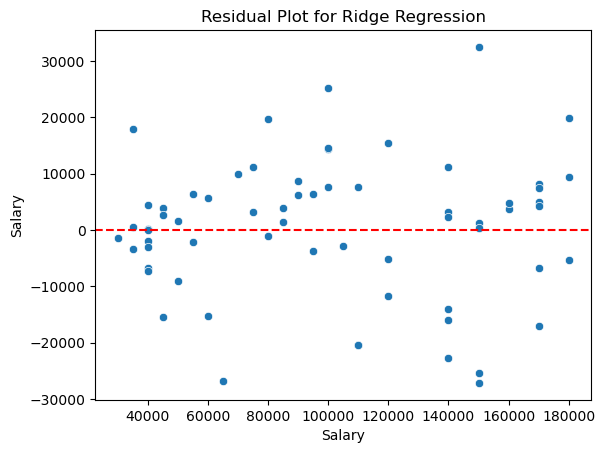

In [438]:
residuals = y_test - ridge_pred  # Replace with best model
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot for Ridge Regression")
plt.show()

# Model Development

In [196]:
Linear_Regression_Model = LinearRegression()
Random_Forest_Model = RandomForestRegressor()

# Model Training

In [203]:
Random_Forest_Model.fit(X_train, y_train)

RandomForestRegressor()

# Model Prediction

In [155]:
y_pred_lr = Linear_Regression_Model.predict(X_test)

In [157]:
y_pred_lr

array([ 60525.62609167, 130399.42635064, 164969.04724595, 130499.1213087 ,
       187052.40952657, 165807.46945543,  57213.70811216, 102350.31324584,
        83838.87456416,  98718.56152467, 107944.58835943, 136958.91475683,
       117476.99382498, 131731.17979855,  34329.00021519,  38223.52081309,
       148741.17558062,  41777.08701725,  41013.37568197,  48566.80925296,
        31337.35908741, 161721.47681928,  63735.23370507, 137797.3369663 ,
        71822.54975044, 162581.34821303,  16768.60345967,  42201.82441776,
       185241.22306115,  85581.19404613, 177175.35620007,  43104.59418007,
       170582.86752127,  59108.07590664, 149601.04697438,  81170.43211305,
        88507.02670861,  91884.75315344,  81084.63537593, 175516.92943267,
        46686.58583953,  54287.87544968, 104502.07125168, 128811.88029702,
        35472.64655987,  48461.02424403,  39706.87946343,  40007.16804335,
       162721.59440703,  81276.08042879,  85465.95405132, 125126.17761574,
        60330.67941061, 1

In [161]:
df = pd.DataFrame({'y_Actual': y_test, 'y_Predicted': y_pred_lr})
df.head()

,y_Actual,y_Predicted
235,45000.0,60525.626092
110,110000.0,130399.426351
249,170000.0,164969.047246
9,110000.0,130499.121309
93,170000.0,187052.409527


In [165]:
df = pd.DataFrame({'y_Actual': y_test, 'y_Predicted': y_pred_lr})
df['Error'] = df['y_Actual'] - df['y_Predicted']
df.head()

,y_Actual,y_Predicted,Error
235,45000.0,60525.626092,-15525.626092
110,110000.0,130399.426351,-20399.426351
249,170000.0,164969.047246,5030.952754
9,110000.0,130499.121309,-20499.121309
93,170000.0,187052.409527,-17052.409527


In [167]:
df = pd.DataFrame({'y_Actual': y_test, 'y_Predicted': y_pred_lr})
df['Error'] = df['y_Actual'] - df['y_Predicted']
df['abs_error'] = abs(df['Error'])
df.head()

,y_Actual,y_Predicted,Error,abs_error
235,45000.0,60525.626092,-15525.626092,15525.626092
110,110000.0,130399.426351,-20399.426351,20399.426351
249,170000.0,164969.047246,5030.952754,5030.952754
9,110000.0,130499.121309,-20499.121309,20499.121309
93,170000.0,187052.409527,-17052.409527,17052.409527


In [169]:
Mean_Absolute_Error = df['abs_error'].mean()
Mean_Absolute_Error

9313.822546657744

In [410]:
from sklearn.model_selection import GridSearchCV
# Define the model
ridge = Ridge()

# Define hyperparameters to tune
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Perform Grid Search
grid_search = GridSearchCV(ridge, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameter
print("Best alpha:", grid_search.best_params_)

# Train the model with the best hyperparameter
best_ridge = grid_search.best_estimator_
y_pred = best_ridge.predict(X_test)

Best alpha: {'alpha': 1}


In [412]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best alpha for Ridge:", grid_search.best_params_['alpha'])

Best alpha for Ridge: 10


In [368]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best alpha for Ridge:", grid_search.best_params_['alpha'])

Best alpha for Ridge: 100


# Model Evalution

In [172]:
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Model Accuracy

In [362]:
r2_score(y_test, y_pred_lr)

0.9346386470349648

In [364]:
print(f"Accuracy of the Model = {round(r2_score(y_test, y_pred_lr),4)*100}%")

Accuracy of the Model = 93.46%


# Mean Absolute Error

In [183]:
round(mean_absolute_error(y_test, y_pred_lr), 2)

9313.82

In [185]:
print(f"Accuracy of the Model = {round(mean_absolute_error(y_test, y_pred_lr),2)}")

Accuracy of the Model = 9313.82


# Mean Squared Error

In [189]:
mse = round(mean_squared_error(y_test, y_pred_lr),2)
mse

149211073.49

In [191]:
print(f"Accuracy of the Model = {round(mean_squared_error(y_test, y_pred_lr),2)}")

Accuracy of the Model = 149211073.49


# Root Mean Squared Error

In [194]:
print("Root Mean Squared Error (RMSE) = ", mse**(0.5))

Root Mean Squared Error (RMSE) =  12215.198462980452


# Coefficients

In [196]:
Linear_Regression_Model.coef_

array([8.32370018e+03, 1.60612961e+04, 2.14491843e+01, 2.33004941e+04,
       1.58547963e+04])

# Intercepts

In [200]:
Linear_Regression_Model.intercept_

84970.79753207578

# Customise Predictions

In [203]:
data1.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode,Age_scaled,Experience_years_scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159,-0.750231,-0.761821
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17,-1.307742,-1.063017
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130,1.061680,0.744158
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101,-0.192720,-0.460625
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22,2.037324,1.497148


. Age = 49

. Gender = 'Female'= 0

. Degree = 'PhD' = 2

. Job_Title = 'Director' = 22

. Experience_years = 15

. Salary = ?

In [210]:
Age1 = std_scaler.transform([[49]])
Age = 5.86448677
Gender = 0
Degree = 2
Job_Title = 22
Experience_years1 = std_scaler.transform([[15]])
Experience_years = 0.74415815

C:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [212]:
std_scaler.transform([[15]])[0][0]

C:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0.7441581452572276

In [214]:
Emp_Salary = Linear_Regression_Model.predict([[Age, Gender, Degree, Job_Title, Experience_years]])
Emp_Salary

C:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([658237.27092784])

In [376]:
print("Salary of the Employee:",round(Emp_Salary[0]))

Salary of the Employee: 658237


In [380]:
experience = np.array([[Age, Gender, Degree, Job_Title, Experience_years]])  # Example: 5 years of experience

# Scale input before prediction
experience_scaled = scaler.transform(experience)
predicted_salary = model.predict(experience_scaled)[0]

print(f"Predicted Salary for {experience[0][0]} years of experience: ₹{predicted_salary:.2f}")


Predicted Salary for 5.86448677 years of experience: ₹94952.25


C:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [493]:
import numpy as np

# Define the values for all required features
Age = 25  # Example: 28 years old
Gender = 1  # Example: 1 for Male, 0 for Female
Degree = 2  # Example: 2 for Master's Degree, 1 for Bachelor's
Job_Title = 3  # Example: 3 for Software Engineer, etc.
Experience_years = 7  # Change to 3 years

# Create input array with all 5 features
experience = np.array([[Age, Gender, Degree, Job_Title, Experience_years]])

# Scale the input before prediction
experience_scaled = scaler.transform(experience)  # Use the trained StandardScaler
predicted_salary = model.predict(experience_scaled)

print(f"Predicted Salary for {Experience_years} years of experience: ₹{predicted_salary[0]:.2f}")


Predicted Salary for 7 years of experience: ₹686121.89


C:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [441]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees
rf.fit(X_train, y_train)

# Predict on the test set
rf_pred = rf.predict(X_test)

# Evaluate Performance
rf_r2 = r2_score(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print(f"Random Forest R² Score: {rf_r2:.4f}")
print(f"Random Forest RMSE: {rf_rmse:.2f}")

Random Forest R² Score: 0.9508
Random Forest RMSE: 10600.97


In [443]:

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Tree depth
    'min_samples_split': [2, 5, 10]  # Minimum samples to split
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters for Random Forest:", best_params)

# Train final model with best parameters
rf_best = RandomForestRegressor(**best_params, random_state=42)
rf_best.fit(X_train, y_train)
rf_best_pred = rf_best.predict(X_test)

# Evaluate best model
rf_best_r2 = r2_score(y_test, rf_best_pred)
rf_best_rmse = np.sqrt(mean_squared_error(y_test, rf_best_pred))

print(f"Optimized Random Forest R² Score: {rf_best_r2:.4f}")
print(f"Optimized Random Forest RMSE: {rf_best_rmse:.2f}")


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Optimized Random Forest R² Score: 0.9508
Optimized Random Forest RMSE: 10601.74


In [517]:
input_features = np.array([[22, 1, 1, 17, 1]])  # Example input (age, gender, degree, job title, experience)
predicted_salary = rf_best.predict(input_features)

print(f"Predicted Salary (LPA): ₹{predicted_salary[0]:.2f} Rupees")

Predicted Salary (LPA): ₹232830.00 Rupees


C:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
